## Neural Network

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv('final_no_na_df.csv')
# Drop any unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.head()

,Maker,Genmodel,Genmodel_ID,avg_sales,avg_price,avg_gas_emission,avg_engine_size,majority_fuel_type,avg_engine_power,avg_wheelbase,...,majority_bodytype,majority_gearbox,avg_prob_angry,avg_prob_disgust,avg_prob_fear,avg_prob_happy,avg_prob_sad,avg_prob_surprise,avg_prob_neutral,majority_label
0,ABARTH,ABARTH 124,2_1,23.000000,30524.090909,150.272727,1368.00000,Petrol,170.000000,2310.0,...,Convertible,Automatic,0.175967,0.034096,0.136359,0.216322,0.138663,0.255023,0.043571,Surprise
1,ABARTH,ABARTH 595,2_4,2259.857143,19294.044586,141.968153,1368.00000,Petrol,155.323276,2300.0,...,Hatchback,Manual,0.134758,0.021127,0.053783,0.246813,0.393607,0.103379,0.046533,Sad
2,ABARTH,ABARTH SPIDER,2_1,469.666667,30524.090909,150.272727,1368.00000,Petrol,170.000000,2310.0,...,Convertible,Automatic,0.175967,0.034096,0.136359,0.216322,0.138663,0.255023,0.043571,Surprise
3,ALFA ROMEO,ALFA ROMEO 159,4_4,635.777778,24677.129801,196.880795,2259.50596,Petrol,170.283019,2700.0,...,Saloon,Manual,0.133810,0.063153,0.098016,0.229438,0.254638,0.137605,0.083341,Sad
4,ALFA ROMEO,ALFA ROMEO 4C,4_7,61.000000,56126.111111,158.777778,1742.00000,Petrol,240.000000,2380.0,...,Convertible,Automatic,0.103934,0.035740,0.213550,0.239398,0.091109,0.209123,0.107145,Happy


In [4]:
np.random.seed(42)
# Separate features and target
X = df.drop(columns=['avg_sales', 'Maker', 'Genmodel','Genmodel_ID'])
y = df['avg_sales']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# One-Hot Encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scale numerical columns
scaler = StandardScaler()
X_train_nums = scaler.fit_transform(X_train[numerical_cols])
X_test_nums = scaler.transform(X_test[numerical_cols])

# Get the one-hot encoded categorical columns
categorical_one_hot_cols = [col for col in X.columns if col not in numerical_cols]
X_train_cats = X_train[categorical_one_hot_cols].values
X_test_cats = X_test[categorical_one_hot_cols].values

# Combine numerical and categorical features
X_train_combined = np.hstack((X_train_nums, X_train_cats))
X_test_combined = np.hstack((X_test_nums, X_test_cats))

# Convert to PyTorch tensors
X_train_combined = torch.tensor(X_train_combined, dtype=torch.float32)
X_test_combined = torch.tensor(X_test_combined, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Get the total number of input features
input_size = X_train_combined.shape[1]
input_size

40

In [5]:
X.head()

,avg_price,avg_gas_emission,avg_engine_size,avg_engine_power,avg_wheelbase,avg_height,avg_width,avg_length,avg_mpg,avg_top_speed,...,majority_bodytype_SUV,majority_bodytype_Saloon,majority_gearbox_Automatic,majority_gearbox_Manual,majority_label_Angry,majority_label_Fear,majority_label_Happy,majority_label_Neutral,majority_label_Sad,majority_label_Surprise
0,30524.090909,150.272727,1368.00000,170.000000,2310.0,1233.000000,1740.00,4045.000000,43.233333,142.666667,...,False,False,True,False,False,False,False,False,False,True
1,19294.044586,141.968153,1368.00000,155.323276,2300.0,1488.685345,1726.75,3591.142241,46.423276,131.808696,...,False,False,False,True,False,False,False,False,True,False
2,30524.090909,150.272727,1368.00000,170.000000,2310.0,1233.000000,1740.00,4045.000000,43.233333,142.666667,...,False,False,True,False,False,False,False,False,False,True
3,24677.129801,196.880795,2259.50596,170.283019,2700.0,1417.471698,1828.00,4660.000000,42.690566,135.075472,...,False,True,False,True,False,False,False,False,True,False
4,56126.111111,158.777778,1742.00000,240.000000,2380.0,1183.000000,2090.00,3989.000000,41.000000,160.000000,...,False,False,True,False,False,False,True,False,False,False


In [6]:
# Define a list of hyperparameters to search over
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'units': [32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'num_layers': [2, 3]
}

# Randomly sample hyperparameter combinations
num_trials = 10
hyperparameter_combinations = [
    {key: random.choice(values) for key, values in param_grid.items()}
    for _ in range(num_trials)
]

# Define the model class without embeddings
class SalesPredictor(nn.Module):
    def __init__(self, input_size, units, dropout_rate, num_layers):
        super(SalesPredictor, self).__init__()
        layer_dims = [input_size] + [units] * num_layers
        layers = []
        
        for i in range(len(layer_dims) - 1):
            layers.append(nn.Linear(layer_dims[i], layer_dims[i + 1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
        layers.append(nn.Linear(layer_dims[-1], 1))  # Final layer for output
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.model(x)

# Track the best model
best_mae = float('inf')
best_params = None

# Hyperparameter tuning loop
for params in hyperparameter_combinations:
    print(f"Trying hyperparameters: {params}")
    
    # Initialize model with current hyperparameters
    model = SalesPredictor(
        input_size=input_size,
        units=params['units'],
        dropout_rate=params['dropout_rate'],
        num_layers=params['num_layers']
    )
    
    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=params['lr'])
    
    # Training loop
    for epoch in range(params['epochs']):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_combined)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
    
    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_combined)
        mae = mean_absolute_error(y_test.numpy(), predictions.numpy())
        print(f"MAE for current model: {mae:.4f}")
    
    # Track the best model
    if mae < best_mae:
        best_mae = mae
        best_params = params
        # Save the best model state
        best_model_state_dict = model.state_dict()

print(f"Best MAE: {best_mae:.4f}")
print(f"Best Hyperparameters: {best_params}")

Trying hyperparameters: {'lr': 0.01, 'units': 64, 'dropout_rate': 0.3, 'batch_size': 32, 'epochs': 100, 'num_layers': 3}
MAE for current model: 3576.8528
Trying hyperparameters: {'lr': 0.001, 'units': 64, 'dropout_rate': 0.3, 'batch_size': 64, 'epochs': 50, 'num_layers': 2}
MAE for current model: 4263.3198
Trying hyperparameters: {'lr': 0.001, 'units': 64, 'dropout_rate': 0.3, 'batch_size': 16, 'epochs': 100, 'num_layers': 3}
MAE for current model: 3825.4727
Trying hyperparameters: {'lr': 0.1, 'units': 64, 'dropout_rate': 0.4, 'batch_size': 32, 'epochs': 100, 'num_layers': 2}
MAE for current model: 4010.7488
Trying hyperparameters: {'lr': 0.01, 'units': 128, 'dropout_rate': 0.2, 'batch_size': 16, 'epochs': 100, 'num_layers': 2}
MAE for current model: 3751.8716
Trying hyperparameters: {'lr': 0.001, 'units': 32, 'dropout_rate': 0.4, 'batch_size': 32, 'epochs': 100, 'num_layers': 3}
MAE for current model: 4191.0337
Trying hyperparameters: {'lr': 0.001, 'units': 128, 'dropout_rate': 0.3, '

Epoch 1/100, Loss: 56074361.8200
Epoch 10/100, Loss: 53787112.4700
Epoch 20/100, Loss: 37394439.0800
Epoch 30/100, Loss: 45867020.3700
Epoch 40/100, Loss: 39943417.3400
Epoch 50/100, Loss: 53399433.3600
Epoch 60/100, Loss: 52973530.2000
Epoch 70/100, Loss: 37602838.2050
Epoch 80/100, Loss: 46161162.2638
Epoch 90/100, Loss: 50703973.0600
Epoch 100/100, Loss: 47785429.2950
Training MAE: 3241.4797, Training MSE: 43086940.0000
Test MAE: 3076.0012, Test MSE: 55026580.0000


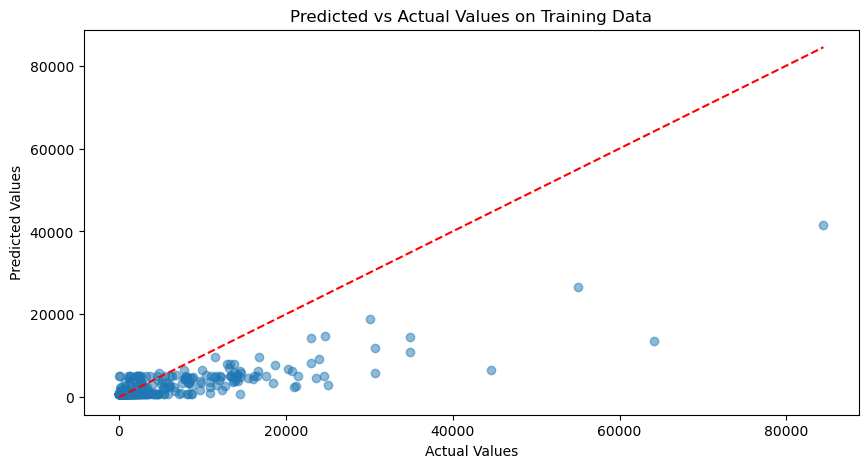

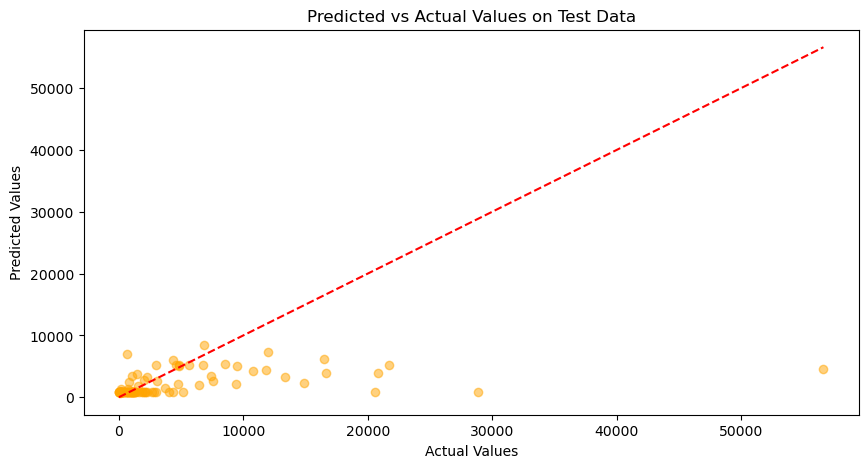

In [8]:
# Use the best hyperparameters found earlier
best_params = {
    'lr': 0.1,  # Replace with the best learning rate found
    'units': 64,  # Replace with the best number of units found
    'dropout_rate': 0.3,  # Replace with the best dropout rate found
    'batch_size': 16,  # Replace with the best batch size found
    'epochs': 100,  # Replace with the best number of epochs found
    'num_layers': 3  # Replace with the best number of layers found
}

# Create DataLoader for mini-batch training
from torch.utils.data import TensorDataset, DataLoader

# Combine features and target for training
train_dataset = TensorDataset(X_train_combined, y_train)
test_dataset = TensorDataset(X_test_combined, y_test)

train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_params['batch_size'], shuffle=False)

# Initialize model with the best hyperparameters
model = SalesPredictor(
    input_size=input_size,
    units=best_params['units'],
    dropout_rate=best_params['dropout_rate'],
    num_layers=best_params['num_layers']
)

# Load the best model state if available
if 'best_model_state_dict' in locals():
    model.load_state_dict(best_model_state_dict)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=best_params['lr'])

# Training loop with mini-batch
for epoch in range(best_params['epochs']):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{best_params['epochs']}, Loss: {avg_loss:.4f}")

# Evaluate the model on training and test sets
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_combined)
    y_test_pred = model(X_test_combined)
    
    # Convert tensors to numpy arrays
    y_train_pred_np = y_train_pred.numpy()
    y_test_pred_np = y_test_pred.numpy()
    y_train_np = y_train.numpy()
    y_test_np = y_test.numpy()
    
    # Calculate evaluation metrics
    train_mae = mean_absolute_error(y_train_np, y_train_pred_np)
    train_mse = mean_squared_error(y_train_np, y_train_pred_np)
    test_mae = mean_absolute_error(y_test_np, y_test_pred_np)
    test_mse = mean_squared_error(y_test_np, y_test_pred_np)
    
    print(f"Training MAE: {train_mae:.4f}, Training MSE: {train_mse:.4f}")
    print(f"Test MAE: {test_mae:.4f}, Test MSE: {test_mse:.4f}")

# Visualize predicted vs actual values for training data
plt.figure(figsize=(10,5))
plt.scatter(y_train_np, y_train_pred_np, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Training Data')
plt.plot([y_train_np.min(), y_train_np.max()], [y_train_np.min(), y_train_np.max()], 'r--')
plt.show()

# Visualize predicted vs actual values for test data
plt.figure(figsize=(10,5))
plt.scatter(y_test_np, y_test_pred_np, alpha=0.5, color='orange')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Test Data')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')
plt.show()

## Linear Model

In [9]:
# Import necessary libraries
import statsmodels.api as sm

In [10]:
# Load the dataset
df = pd.read_csv('final_no_na_df.csv')

# Define target variable and drop high-cardinality categorical variables
X = df.drop(columns=['Unnamed: 0', 'avg_sales', 'Maker', 'Genmodel', 'Genmodel_ID'])
y = df['avg_sales']

# One-hot encode the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)
        
# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Output the model summary
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              avg_sales   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     3.338
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.73e-09
Time:                        16:06:27   Log-Likelihood:                -5042.0
No. Observations:                 487   AIC:                         1.016e+04
Df Residuals:                     450   BIC:                         1.031e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        2.431e+10   2.44e+10      0.998      0.319   -2.36e+10    7.22e+10
avg_price                       0.0281      0.029      0.975      0.330      -0.029       0.085
avg_gas_emission              -15.5030     18.395     -0.843      0.400     -51.653      20.647
avg_engine_size                 1.0040      1.585      0.633      0.527      -2.111       4.119
avg_engine_power              -43.9262     19.385     -2.266      0.024     -82.022      -5.830
avg_wheelbase                  -0.3005      1.001     -0.300      0.764      -2.269       1.668
avg_height                     -6.1452      6.159     -0.998      0.319     -18.249       5.959
avg_width                       6.2207      3.737      1.665      0.097      -1.123      13.564
avg_length                     -1.5378      2.136     -0.720      0.472      -5.735       2.659
avg_mpg                       152.2634     69.673      2.185      0.029      15.339     289.188
avg_top_speed                 137.1542     70.888      1.935      0.054      -2.158     276.467
majority_seat_num            1209.1602    711.491      1.699      0.090    -189.096    2607.417
majority_door_num           -1265.6230    754.160     -1.678      0.094   -2747.736     216.490
majority_engine_size         1442.4942   1120.692      1.287      0.199    -759.946    3644.934
avg_prob_angry              -2.431e+10   2.44e+10     -0.998      0.319   -7.22e+10    2.36e+10
avg_prob_disgust            -2.431e+10   2.44e+10     -0.998      0.319   -7.22e+10    2.36e+10
avg_prob_fear               -2.431e+10   2.44e+10     -0.998      0.319   -7.22e+10    2.36e+10
avg_prob_happy              -2.431e+10   2.44e+10     -0.998      0.319   -7.22e+10    2.36e+10
avg_prob_sad                -2.431e+10   2.44e+10     -0.998      0.319   -7.22e+10    2.36e+10
avg_prob_surprise           -2.431e+10   2.44e+10     -0.998      0.319   -7.22e+10    2.36e+10
avg_prob_neutral            -2.431e+10   2.44e+10     -0.998      0.319   -7.22e+10    2.36e+10
majority_fuel_type_Other    -6975.0658   3362.911     -2.074      0.039   -1.36e+04    -366.107
majority_fuel_type_Petrol    1729.0978   1059.310      1.632      0.103    -352.711    3810.907
majority_bodytype_Coupe      -132.2187   1926.978     -0.069      0.945   -3919.212    3654.774
majority_bodytype_Estate     3102.6024   3272.720      0.948      0.344   -3329.109    9534.314
majority_bodytype_Hatchback  6116.1906   2794.148      2.189      0.029     624.993    1.16e+04
majority_bodytype_Limousine  -956.7850   9864.735     -0.097      0.923   -2.03e+04    1.84e+04
majority_bodytype_MPV        2174.7796   3424.624      0.635      0.526   -4555.462    8905.021
majority_bodytype_Pickup     6328.7694   8823.370      0.717      0.474    -1.1e+04    2.37e+04
majority_bo

In [11]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [12]:
car_data = pd.read_csv('car_data.csv')
car_data

,Unnamed: 0,Maker,Genmodel,Genmodel_ID,Year,Sales,avg_price,avg_gas_emission,avg_engine_size,majority_fuel_type,...,avg_prob_angry,avg_prob_disgust,avg_prob_fear,avg_prob_happy,avg_prob_sad,avg_prob_surprise,avg_prob_neutral,majority_label,avg_review_rating,avg_sentiment_ating
0,1,ABARTH,ABARTH 124,2_1,2018,27,31225.000000,150.000000,1368.000000,Petrol,...,0.175967,0.034096,0.136359,0.216322,0.138663,0.255023,0.043571,Surprise,NaN,NaN
1,2,ABARTH,ABARTH 124,2_1,2017,60,29131.666667,149.666667,1368.000000,Petrol,...,0.175967,0.034096,0.136359,0.216322,0.138663,0.255023,0.043571,Surprise,NaN,NaN
2,3,ABARTH,ABARTH 500,2_2,2016,66,14975.000000,136.500000,1368.000000,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,ABARTH,ABARTH 500,2_2,2015,717,14975.000000,136.500000,1368.000000,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,ABARTH,ABARTH 500,2_2,2014,762,14764.166667,136.500000,1368.000000,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5264,5265,VOLVO,VOLVO XC90,96_18,2008,1879,39397.573529,255.323529,2941.764706,Diesel,...,0.173642,0.053245,0.091733,0.215394,0.224310,0.135119,0.106557,Surprise,4.095930,3.372093
5265,5266,VOLVO,VOLVO XC90,96_18,2007,3232,40045.846154,261.615385,3047.564103,Diesel,...,0.173642,0.053245,0.091733,0.215394,0.224310,0.135119,0.106557,Surprise,4.466071,3.928571
5266,5267,VOLVO,VOLVO XC90,96_18,2006,3547,37579.604651,256.790698,2726.837209,Diesel,...,0.173642,0.053245,0.091733,0.215394,0.224310,0.135119,0.106557,Surprise,4.385714,3.957143
5267,5268,VOLVO,VOLVO XC90,96_18,2005,4614,37211.860465,258.883721,2691.488372,Diesel,...,0.173642,0.053245,0.091733,0.215394,0.224310,0.135119,0.106557,Surprise,4.025000,3.228571


In [13]:
# Replace explicit 'nan' strings with actual numpy.nan
car_data.replace(['nan', 'NA', 'N/A', '', 'null', 'Null'], np.nan, inplace=True)

# Separate categorical and numerical columns
categorical_columns = car_data.select_dtypes(include=['object']).columns
numerical_columns = car_data.select_dtypes(include=['float64', 'int64']).columns

# Step 1: Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    car_data[col] = car_data[col].astype(str)  # Ensure all values are strings for encoding
    car_data[col] = le.fit_transform(car_data[col].fillna('missing'))  # Encode with placeholder
    label_encoders[col] = le

# Step 2: Combine numerical and encoded categorical columns for KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(car_data)

# Step 3: Convert the imputed data back to a DataFrame
car_data_imputed = pd.DataFrame(imputed_data, columns=car_data.columns)

# Step 4: Decode categorical columns back to their original labels
for col in categorical_columns:
    le = label_encoders[col]
    
    # Ensure all values are rounded and converted to integers
    car_data_imputed[col] = car_data_imputed[col].round().astype(int)
    
    # Validate that values are within the range of encoded labels
    max_label = len(le.classes_) - 1
    car_data_imputed[col] = car_data_imputed[col].apply(
        lambda x: le.inverse_transform([x])[0] if 0 <= x <= max_label else 'unknown'
    )

# Validate the dataset for missing values after imputation
missing_summary_after = car_data_imputed.isnull().sum()
print("Missing values after imputation:\n", missing_summary_after)


# Save the processed dataset after KNN imputation
car_data_imputed.to_csv('knn_imputed_data.csv', index=False)

car_data_imputed

Missing values after imputation:
 Unnamed: 0              0
Maker                   0
Genmodel                0
Genmodel_ID             0
Year                    0
Sales                   0
avg_price               0
avg_gas_emission        0
avg_engine_size         0
majority_fuel_type      0
avg_engine_power        0
avg_wheelbase           0
avg_height              0
avg_width               0
avg_length              0
avg_mpg                 0
avg_top_speed           0
majority_seat_num       0
majority_door_num       0
majority_engine_size    0
majority_bodytype       0
majority_gearbox        0
avg_prob_angry          0
avg_prob_disgust        0
avg_prob_fear           0
avg_prob_happy          0
avg_prob_sad            0
avg_prob_surprise       0
avg_prob_neutral        0
majority_label          0
avg_review_rating       0
avg_sentiment_ating     0
dtype: int64


,Unnamed: 0,Maker,Genmodel,Genmodel_ID,Year,Sales,avg_price,avg_gas_emission,avg_engine_size,majority_fuel_type,...,avg_prob_angry,avg_prob_disgust,avg_prob_fear,avg_prob_happy,avg_prob_sad,avg_prob_surprise,avg_prob_neutral,majority_label,avg_review_rating,avg_sentiment_ating
0,1.0,ABARTH,ABARTH 124,2_1,2018.0,27.0,31225.000000,150.000000,1368.000000,Petrol,...,0.175967,0.034096,0.136359,0.216322,0.138663,0.255023,0.043571,Surprise,4.457783,4.006975
1,2.0,ABARTH,ABARTH 124,2_1,2017.0,60.0,29131.666667,149.666667,1368.000000,Petrol,...,0.175967,0.034096,0.136359,0.216322,0.138663,0.255023,0.043571,Surprise,4.457783,4.006975
2,3.0,ABARTH,ABARTH 500,2_2,2016.0,66.0,14975.000000,136.500000,1368.000000,Petrol,...,0.084839,0.047312,0.165972,0.242197,0.158198,0.175424,0.126058,nan,4.613952,4.092689
3,4.0,ABARTH,ABARTH 500,2_2,2015.0,717.0,14975.000000,136.500000,1368.000000,Petrol,...,0.112100,0.036802,0.177018,0.228543,0.169492,0.172390,0.103655,nan,4.447052,4.087842
4,5.0,ABARTH,ABARTH 500,2_2,2014.0,762.0,14764.166667,136.500000,1368.000000,Petrol,...,0.122949,0.039652,0.146840,0.240304,0.178772,0.153475,0.118008,nan,4.281575,3.973556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5264,5265.0,VOLVO,VOLVO XC90,96_18,2008.0,1879.0,39397.573529,255.323529,2941.764706,Diesel,...,0.173642,0.053245,0.091733,0.215394,0.224310,0.135119,0.106557,Surprise,4.095930,3.372093
5265,5266.0,VOLVO,VOLVO XC90,96_18,2007.0,3232.0,40045.846154,261.615385,3047.564103,Diesel,...,0.173642,0.053245,0.091733,0.215394,0.224310,0.135119,0.106557,Surprise,4.466071,3.928571
5266,5267.0,VOLVO,VOLVO XC90,96_18,2006.0,3547.0,37579.604651,256.790698,2726.837209,Diesel,...,0.173642,0.053245,0.091733,0.215394,0.224310,0.135119,0.106557,Surprise,4.385714,3.957143
5267,5268.0,VOLVO,VOLVO XC90,96_18,2005.0,4614.0,37211.860465,258.883721,2691.488372,Diesel,...,0.173642,0.053245,0.091733,0.215394,0.224310,0.135119,0.106557,Surprise,4.025000,3.228571


In [14]:
df = car_data_imputed
df = df.drop(columns=['Unnamed: 0'])

In [15]:
# Separate features and target
X = df.drop(columns=['Sales', 'Maker', 'Genmodel','Genmodel_ID'])
y = df['Sales']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# One-Hot Encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scale numerical columns
scaler = StandardScaler()
X_train_nums = scaler.fit_transform(X_train[numerical_cols])
X_test_nums = scaler.transform(X_test[numerical_cols])

# Get the one-hot encoded categorical columns
categorical_one_hot_cols = [col for col in X.columns if col not in numerical_cols]
X_train_cats = X_train[categorical_one_hot_cols].values
X_test_cats = X_test[categorical_one_hot_cols].values

# Combine numerical and categorical features
X_train_combined = np.hstack((X_train_nums, X_train_cats))
X_test_combined = np.hstack((X_test_nums, X_test_cats))

# Convert to PyTorch tensors
X_train_combined = torch.tensor(X_train_combined, dtype=torch.float32)
X_test_combined = torch.tensor(X_test_combined, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Get the total number of input features
input_size = X_train_combined.shape[1]
input_size

52

In [16]:
# Define a list of hyperparameters to search over
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'units': [32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'num_layers': [2, 3]
}

# Randomly sample hyperparameter combinations
num_trials = 10
hyperparameter_combinations = [
    {key: random.choice(values) for key, values in param_grid.items()}
    for _ in range(num_trials)
]

# Define the model class without embeddings
class SalesPredictor(nn.Module):
    def __init__(self, input_size, units, dropout_rate, num_layers):
        super(SalesPredictor, self).__init__()
        layer_dims = [input_size] + [units] * num_layers
        layers = []
        
        for i in range(len(layer_dims) - 1):
            layers.append(nn.Linear(layer_dims[i], layer_dims[i + 1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
        layers.append(nn.Linear(layer_dims[-1], 1))  # Final layer for output
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.model(x)

# Track the best model
best_mae = float('inf')
best_params = None

# Hyperparameter tuning loop
for params in hyperparameter_combinations:
    print(f"Trying hyperparameters: {params}")
    
    # Initialize model with current hyperparameters
    model = SalesPredictor(
        input_size=input_size,
        units=params['units'],
        dropout_rate=params['dropout_rate'],
        num_layers=params['num_layers']
    )
    
    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=params['lr'])
    
    # Training loop
    for epoch in range(params['epochs']):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_combined)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
    
    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_combined)
        mae = mean_absolute_error(y_test.numpy(), predictions.numpy())
        print(f"MAE for current model: {mae:.4f}")
    
    # Track the best model
    if mae < best_mae:
        best_mae = mae
        best_params = params
        # Save the best model state
        best_model_state_dict = model.state_dict()

print(f"Best MAE: {best_mae:.4f}")
print(f"Best Hyperparameters: {best_params}")

Trying hyperparameters: {'lr': 0.1, 'units': 32, 'dropout_rate': 0.3, 'batch_size': 64, 'epochs': 100, 'num_layers': 2}
MAE for current model: 4735.3618
Trying hyperparameters: {'lr': 0.1, 'units': 32, 'dropout_rate': 0.2, 'batch_size': 16, 'epochs': 100, 'num_layers': 3}
MAE for current model: 4138.6597
Trying hyperparameters: {'lr': 0.1, 'units': 32, 'dropout_rate': 0.3, 'batch_size': 32, 'epochs': 100, 'num_layers': 2}
MAE for current model: 4733.5605
Trying hyperparameters: {'lr': 0.1, 'units': 128, 'dropout_rate': 0.3, 'batch_size': 64, 'epochs': 100, 'num_layers': 3}
MAE for current model: 2561.4219
Trying hyperparameters: {'lr': 0.01, 'units': 32, 'dropout_rate': 0.2, 'batch_size': 64, 'epochs': 100, 'num_layers': 2}
MAE for current model: 5298.3545
Trying hyperparameters: {'lr': 0.01, 'units': 64, 'dropout_rate': 0.4, 'batch_size': 16, 'epochs': 50, 'num_layers': 3}
MAE for current model: 5363.2124
Trying hyperparameters: {'lr': 0.1, 'units': 64, 'dropout_rate': 0.4, 'batch_siz

Epoch 1/100, Loss: 64009349.1515
Epoch 10/100, Loss: 70670952.6061
Epoch 20/100, Loss: 58161571.5758
Epoch 30/100, Loss: 67986725.0303
Epoch 40/100, Loss: 49592230.7576
Epoch 50/100, Loss: 53286986.2424
Epoch 60/100, Loss: 47802709.2273
Epoch 70/100, Loss: 41814170.0758
Epoch 80/100, Loss: 50316138.2727
Epoch 90/100, Loss: 41977769.8939
Epoch 100/100, Loss: 41899749.7727
Training MAE: 2948.5044, Training MSE: 26212184.0000
Test MAE: 3312.2102, Test MSE: 35338408.0000


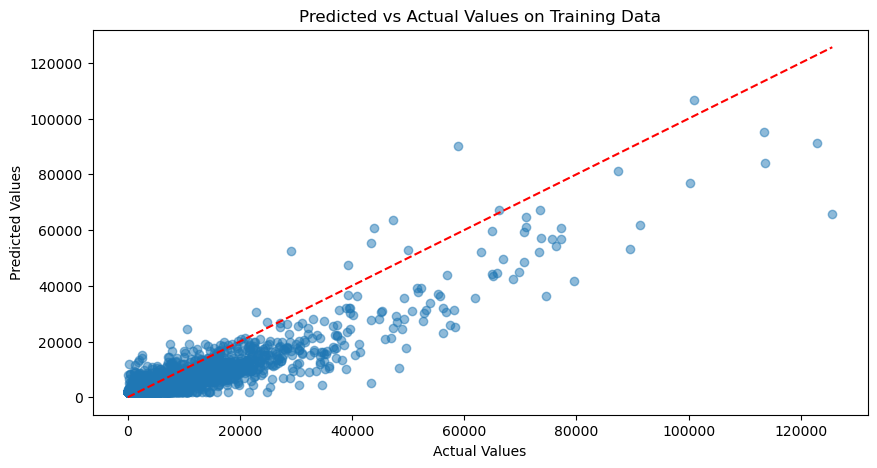

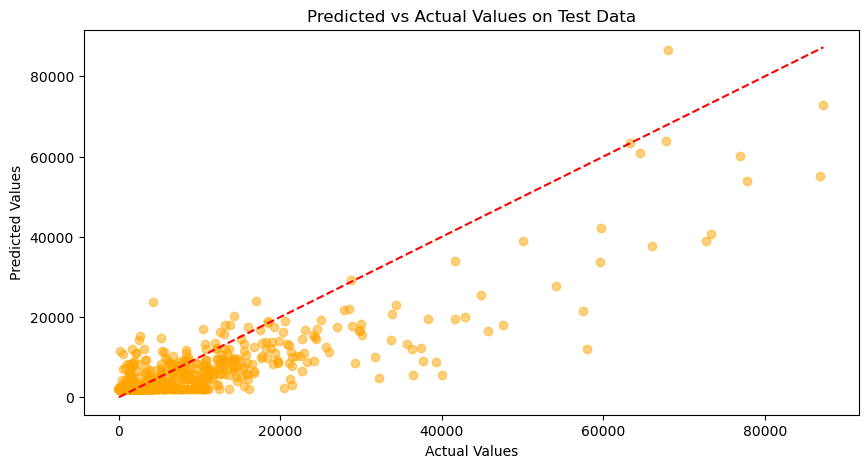

In [18]:
# Use the best hyperparameters found earlier
best_params = {
    'lr': 0.1,  # Replace with the best learning rate found
    'units': 128,  # Replace with the best number of units found
    'dropout_rate': 0.3,  # Replace with the best dropout rate found
    'batch_size': 64,  # Replace with the best batch size found
    'epochs': 100,  # Replace with the best number of epochs found
    'num_layers': 3  # Replace with the best number of layers found
}

# Create DataLoader for mini-batch training
from torch.utils.data import TensorDataset, DataLoader

# Combine features and target for training
train_dataset = TensorDataset(X_train_combined, y_train)
test_dataset = TensorDataset(X_test_combined, y_test)

train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_params['batch_size'], shuffle=False)

# Initialize model with the best hyperparameters
model = SalesPredictor(
    input_size=input_size,
    units=best_params['units'],
    dropout_rate=best_params['dropout_rate'],
    num_layers=best_params['num_layers']
)

# Load the best model state if available
if 'best_model_state_dict' in locals():
    model.load_state_dict(best_model_state_dict)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=best_params['lr'])

# Training loop with mini-batch
for epoch in range(best_params['epochs']):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{best_params['epochs']}, Loss: {avg_loss:.4f}")

# Evaluate the model on training and test sets
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_combined)
    y_test_pred = model(X_test_combined)
    
    # Convert tensors to numpy arrays
    y_train_pred_np = y_train_pred.numpy()
    y_test_pred_np = y_test_pred.numpy()
    y_train_np = y_train.numpy()
    y_test_np = y_test.numpy()
    
    # Calculate evaluation metrics
    train_mae = mean_absolute_error(y_train_np, y_train_pred_np)
    train_mse = mean_squared_error(y_train_np, y_train_pred_np)
    test_mae = mean_absolute_error(y_test_np, y_test_pred_np)
    test_mse = mean_squared_error(y_test_np, y_test_pred_np)
    
    print(f"Training MAE: {train_mae:.4f}, Training MSE: {train_mse:.4f}")
    print(f"Test MAE: {test_mae:.4f}, Test MSE: {test_mse:.4f}")

# Visualize predicted vs actual values for training data
plt.figure(figsize=(10,5))
plt.scatter(y_train_np, y_train_pred_np, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Training Data')
plt.plot([y_train_np.min(), y_train_np.max()], [y_train_np.min(), y_train_np.max()], 'r--')
plt.show()

# Visualize predicted vs actual values for test data
plt.figure(figsize=(10,5))
plt.scatter(y_test_np, y_test_pred_np, alpha=0.5, color='orange')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Test Data')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')
plt.show()

In [19]:
df = car_data_imputed
# Define target variable and drop high-cardinality categorical variables
X = df.drop(columns=['Unnamed: 0', 'Sales', 'Maker', 'Genmodel', 'Genmodel_ID'])
y = df['Sales']

# One-hot encode the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)
        
# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Output the model summary
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     35.76
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          1.11e-280
Time:                        16:07:09   Log-Likelihood:                -55613.
No. Observations:                5269   AIC:                         1.113e+05
Df Residuals:                    5220   BIC:                         1.116e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          7.302e+09   1.02e+10      0.718      0.473   -1.26e+10    2.72e+10
Year                             83.6901     34.321      2.438      0.015      16.406     150.974
avg_price                         0.0211      0.008      2.686      0.007       0.006       0.037
avg_gas_emission                -27.9198      5.105     -5.469      0.000     -37.928     -17.912
avg_engine_size                   0.5290      0.390      1.357      0.175      -0.235       1.293
avg_engine_power                -16.3958      3.190     -5.140      0.000     -22.649     -10.142
avg_wheelbase                     1.4886      0.281      5.306      0.000       0.939       2.039
avg_height                       -3.1204      1.058     -2.948      0.003      -5.195      -1.046
avg_width                        12.6034      1.356      9.295      0.000       9.945      15.262
avg_length                       -3.3059      0.636     -5.194      0.000      -4.554      -2.058
avg_mpg                          40.0369     10.060      3.980      0.000      20.315      59.759
avg_top_speed                    41.9287     14.230      2.947      0.003      14.033      69.825
majority_seat_num               490.2867    186.391      2.630      0.009     124.882     855.691
majority_door_num               180.3720    246.656      0.731      0.465    -303.176     663.920
majority_engine_size           -255.6103    291.212     -0.878      0.380    -826.507     315.286
avg_prob_angry                -7.302e+09   1.02e+10     -0.718      0.473   -2.72e+10    1.26e+10
avg_prob_disgust              -7.302e+09   1.02e+10     -0.718      0.473   -2.72e+10    1.26e+10
avg_prob_fear                 -7.302e+09   1.02e+10     -0.718      0.473   -2.72e+10    1.26e+10
avg_prob_happy                -7.302e+09   1.02e+10     -0.718      0.473   -2.72e+10    1.26e+10
avg_prob_sad                  -7.302e+09   1.02e+10     -0.718      0.473   -2.72e+10    1.26e+10
avg_prob_surprise             -7.302e+09   1.02e+10     -0.718      0.473   -2.72e+10    1.26e+10
avg_prob_neutral              -7.302e+09   1.02e+10     -0.718      0.473   -2.72e+10    1.26e+10
avg_review_rating              -445.3376    660.342     -0.674      0.500   -1739.885     849.210
avg_sentiment_ating           -1287.4354    483.516     -2.663      0.008   -2235.328    -339.543
majority_fuel_type_Other      -6165.6625    955.713     -6.451      0.000   -8039.259   -4292.066
majority_fuel_type_Petrol      1172.4007    357.522      3.279      0.001     471.508    1873.293
majority_fuel_type_nan        -1160.8813    443.523     -2.617      0.009   -2030.372    -291.391
majority_bodytype_Combi Van    4854.2971   9476.837      0.512      0.609   -1.37e+04    2.34e+04
majority_bodytype_Convertible  5080.7172   93

In [23]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Function to preprocess and prepare data sequences
def prepare_data(data, sequence_length=3):
    # Group data by Genmodel
    grouped_data = data.groupby('Genmodel')

    # Initialize storage for sequences and targets
    X, y = [], []

    for genmodel, group in grouped_data:
        # Sort by Year to ensure temporal order
        group = group.sort_values(by='Year')

        # Keep only numerical columns, excluding the target and identifiers
        features = group.select_dtypes(include=[np.number]).drop(columns=['Sales', 'Year'], errors='ignore')
        target = group['Sales']

        # Fill missing values
        features = features.fillna(features.mean())
        target = target.fillna(target.mean())

        # Normalize features and target
        scaler_features = MinMaxScaler()
        scaler_target = MinMaxScaler()
        features_normalized = scaler_features.fit_transform(features)
        target_normalized = scaler_target.fit_transform(target.values.reshape(-1, 1))

        # Create sequences for the current Genmodel
        for i in range(len(features_normalized) - sequence_length):
            X.append(features_normalized[i:i + sequence_length, :])
            y.append(target_normalized[i + sequence_length])

    return np.array(X), np.array(y)

# Function to build the RNN model
def build_rnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(1)  # Single output for predicting sales
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Function to plot learning curves
def plot_learning_curve(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to plot predictions vs actual values
def plot_predictions(model, X_test, y_test, scaler_target):
    predictions = model.predict(X_test).flatten()
    actual = scaler_target.inverse_transform(y_test)
    predicted = scaler_target.inverse_transform(predictions.reshape(-1, 1))

    plt.figure(figsize=(10, 5))
    plt.scatter(actual, predicted, alpha=0.5)
    # plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r', linestyle='--', label='Perfect Prediction')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.legend()
    plt.show()

Epoch 1/100


C:\Users\Shawn Ding\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1444 - mae: 0.3138 - val_loss: 0.1149 - val_mae: 0.2847
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1124 - mae: 0.2834 - val_loss: 0.1095 - val_mae: 0.2727
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0994 - mae: 0.2676 - val_loss: 0.1056 - val_mae: 0.2724
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0976 - mae: 0.2645 - val_loss: 0.1051 - val_mae: 0.2717
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0948 - mae: 0.2624 - val_loss: 0.1100 - val_mae: 0.2790
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0943 - mae: 0.2580 - val_loss: 0.1038 - val_mae: 0.2703
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0843 - mae: 0.2423 - val_loss: 0.1028 - val_mae: 0.2678
Epoch 8/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0861 - mae: 0.2470 - val_loss: 0.1058 - val_mae: 0.2706
Epoch 9/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

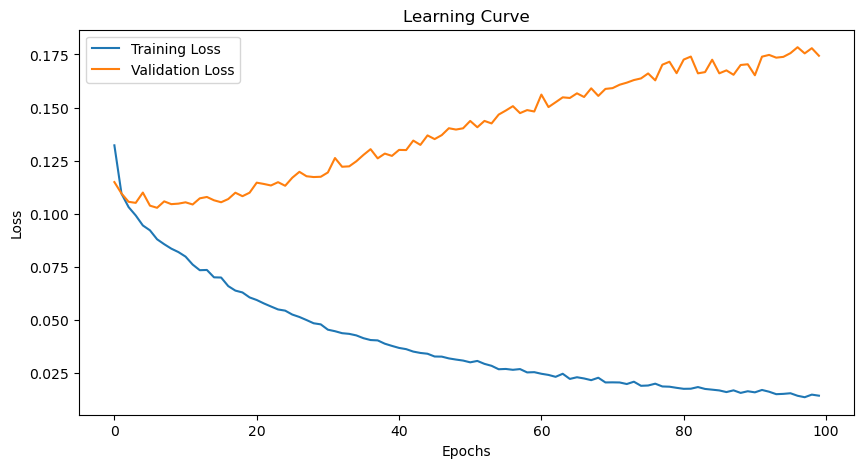

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


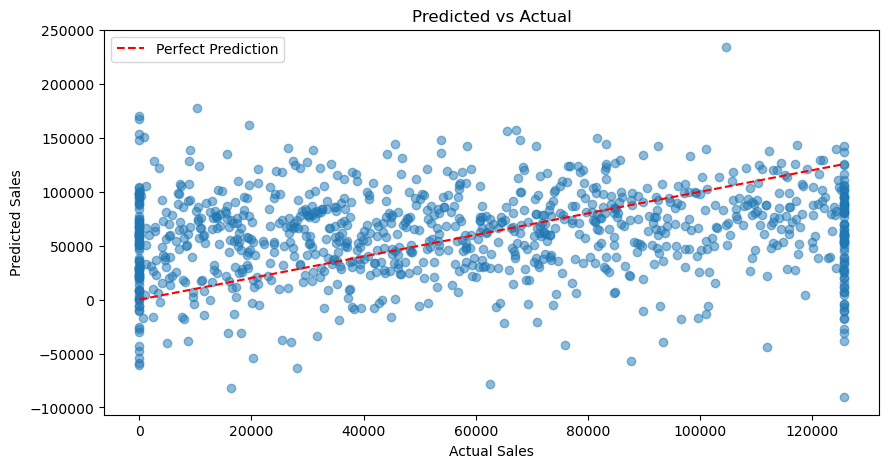

In [30]:
# Load the dataset
data = car_data_imputed

# Prepare data sequences
sequence_length = 3  # Adjust this value as needed
X, y = prepare_data(data, sequence_length=sequence_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the RNN model
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
model = build_rnn_model(input_shape)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=16, verbose=1)

# Plot the learning curve
plot_learning_curve(history)

# Evaluate and visualize predictions
scaler_target = MinMaxScaler()
scaler_target.fit(data[['Sales']].dropna())
plot_predictions(model, X_test, y_test, scaler_target)